# Contributors
**Team SheCodes**

1.  Asha Balshiram Aher 
2.  Sri Sruthi Chilukuri 
3.  Swati Ganesh Narkhede 
4.  Monica Dommaraju


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Story

Employee Attrition has been one of the most common problems and an unavoidable cost for any organisation.

*   When a highly performing employee attrites; its a loss to the organization as the work flow becomes stagnant until the organisation finds a new resource.
*  When an employee who is underperforming attrites; it saves the company time and revenue.

*   It is discovered that the IT industry sees highest Attrition rate among all other sectors and the reasons can be many.
*  Poor training or poor management
* Lack of growth and opportunities for advancement in the company
* Inaacurate profiles filling a Job position
* Employee dissatisfaction
* Economic crisis, etc.

It is essential to discover the trend of attrition to compensate the loss of a resource and this trend will change from an organisation to organisation.
* We have collected Employee data of IBM organisation; an international technological company which has operations spread over 150 countries all over the world.
* To be able to come up with an accurate prediction system which can predict the potential attrition for any given employee profile at IBM organisation is the goal of our project.

#Objective
The Goal of this Project is to predict the Employee Attrition and several factors associated with it. We have applied below classifiers and trained the model 

*   Logistic Regression
*   K Nearest Neighbour
*   Support Vector Classifier
*   Decision TreeClassifier
*   Naive Bayes
*   Random forests
*   XGBoost Classifier
*   MLP Classifier
*   Random Forest Classifier

We have also tried to get insights on what every classification is telling us about our data (which has been covered in conclusion section-Comparision of accuracies)
The ultimate goal of this project is to predict the employee attrition given the employee details, salaries for the same job type and role in the market,  GDP of the city Employee is working in.

#Data Collection 
We have collected three different datasets. One from Kaggle donated by IBM, other two were generated by us, using web scraping techniques.


1.   IBM dataset contains features such as Job Position, Group, Salary, Satisfaction Level, Gender etc. This dataset consists of total 1470 rows and 35 features.
2.   Market salaries for the Job Role and Level were scraped from Glassdoor website using Beautiful Soup Library. We have extracted Low, Average and High salaries for each Job Role.
3.  GDP data for each city was also generated using Web Scraping from Wikipedia.

We have later amalgamated all three datasets in order to improve the prediction based on Market salaries and GDP. The class label `Attrition` is used to identify if the employee left the organization or still with the organization.

*  Importing the Required Libraries





In [0]:
import pandas as pd
import numpy as np
from google.colab import drive

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score, \
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import collections
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/HR_Employee_Attrition.csv",sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [0]:
df_salaries = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/salaries.csv", sep=',')
df_salaries.rename(columns={"job_title": "JobRole"}, inplace=True)
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   9 non-null      int64 
 1   JobRole      9 non-null      object
 2   avg_salary   9 non-null      int64 
 3   low_salary   9 non-null      int64 
 4   high_salary  9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [0]:
df_salaries.describe()

,Unnamed: 0,avg_salary,low_salary,high_salary
count,9.000000,9.000000,9.000000,9.000000
mean,4.000000,71565.666667,48000.000000,106444.444444
std,2.738613,33932.732490,23659.036329,46030.183334
min,0.000000,30875.000000,24000.000000,40000.000000
25%,2.000000,50804.000000,35000.000000,88000.000000
50%,4.000000,69239.000000,42000.000000,112000.000000
75%,6.000000,77173.000000,51000.000000,127000.000000
max,8.000000,130594.000000,95000.000000,171000.000000


In [0]:
df_gdp = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/final_gdp.csv")
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   County             5 non-null      object
 1   Population         5 non-null      int64 
 2   Per Capita Income  5 non-null      int64 
 3   GDP                5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [0]:
df_gdp.describe()

,Population,Per Capita Income,GDP
count,5.000000e+00,5.000000,5.000000e+00
mean,1.385673e+06,40958.400000,5.486520e+10
std,1.088270e+06,8291.321294,3.713316e+10
min,4.315550e+05,30526.000000,1.317365e+10
25%,7.398370e+05,34416.000000,3.491883e+10
50%,8.290720e+05,42666.000000,4.144199e+10
75%,1.841569e+06,47198.000000,7.857238e+10
max,3.086331e+06,49986.000000,1.062192e+11


#Dataset Amalgamation
**1. Merging the IBM dataset and Glassdoor extracted salaries based on Job Role**

In [0]:
df_with_salaries = pd.merge(df, df_salaries, on="JobRole", how='left')

Converting the annual salaries of low, avg and high salaries to monthly salaries

In [0]:
df_with_salaries['low_salary'] = df_with_salaries['low_salary'].div(12).round()
df_with_salaries['avg_salary'] = df_with_salaries['avg_salary'].div(12).round()
df_with_salaries['high_salary'] = df_with_salaries['high_salary'].div(12).round()

In [0]:
df_with_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [0]:
df_with_salaries.drop('Unnamed: 0', axis=1, inplace=True)

In [0]:
df_with_salaries.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,avg_salary,low_salary,high_salary
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,5837.068707,3870.827891,8701.279592
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,2474.074722,1719.011483,3492.987578
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2573.000000,2000.000000,3333.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2897.000000,2083.000000,3917.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,6346.000000,3750.000000,9333.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,6431.000000,4250.000000,10583.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,10883.000000,7917.000000,14250.000000


**2. Merging the resultant dataset from above with the GDP dataset**


GDP dataset has Total population and GDP columns. However, we are only interested in per captita income per month column . So dropping the other two columns

In [0]:
df_gdp.drop(['Population', 'GDP'], axis=1, inplace=True)
df_gdp['Per Capita Income'] = df_gdp['Per Capita Income'].div(12).round()

The way we have chosen the City is based on the following rules.


1.   Employees with the same job role and level are grouped.
2.   For each such group, we have the assigned the cities with highest GDP to lowest GDPs in order to the employees earning the highest salary to the lowest. 

In [0]:
def add_city(group_df):
    if group_df.shape[0] == 1:
        group_df['County'] = 'San Francisco'
    else:
        labels = ['Santa Barbara', 'San Mateo', 'Orange', 'Santa Clara', 'San Francisco']
        group_df.sort_values(by='MonthlyIncome', ascending=True, inplace=True)
        cities = pd.qcut(group_df["MonthlyIncome"], q=[0, .2, .4, .6, .8, 1], labels=labels)
        group_df['County'] = cities
    return group_df


In [0]:
final_df = df_with_salaries.groupby(['JobRole', 'JobLevel']).apply(add_city)
final_df = final_df.droplevel(level=[0, 1]).sort_index()

Now Merging the GDP dataset based on the County column inferenced above.

In [0]:
df = pd.merge(final_df, df_gdp, on="County", how='left')

The Final dataset which we will be working is exported to a spreadsheet as a checkpoint.

In [0]:
df.to_csv("/content/drive/Shared drives/SheCodes/Datasets/new_dataset.csv", index=False)

# Observations


**Correlation Plot**


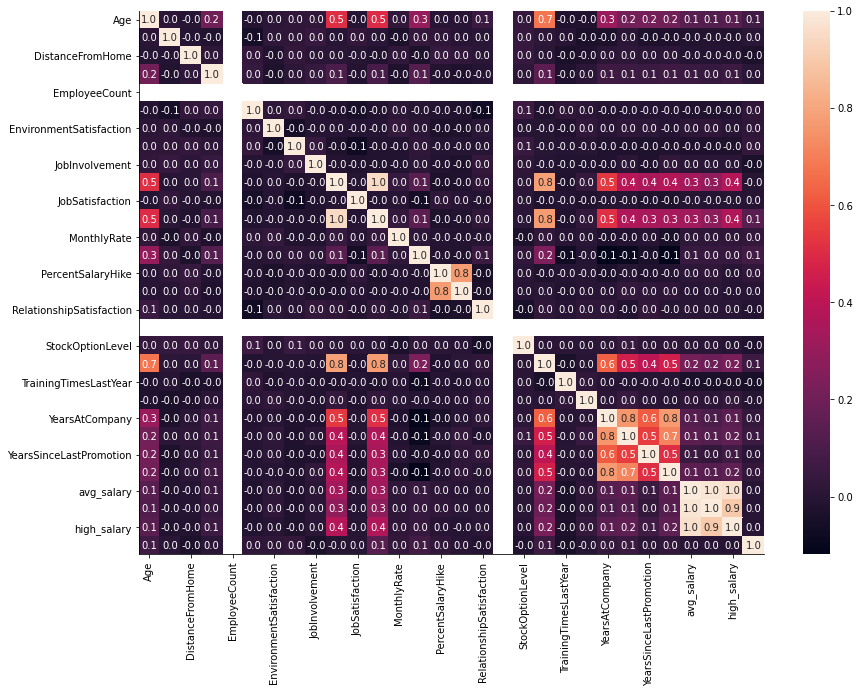

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
# correlation plot to know which attributes show highest correlation
corr = df.corr()
g = sns.heatmap(corr, annot=True, fmt='.1f')
sns.despine()
g.figure.set_size_inches(14, 10)
plt.show()

We can see that TotalWorkingYears and MonthlyIncome have highest correlation and also looks important. Similarly Age and TotalWorkingYears are highly correlated So lets work on these two features for linear regression analysis.

**Count Plot**

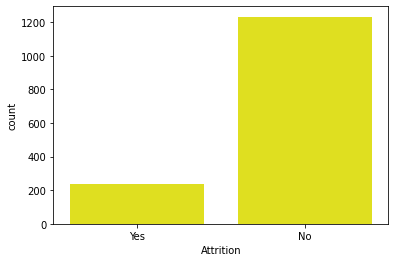

Attrition percentage No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


In [0]:
sns.countplot(x='Attrition', data=df, color='yellow')
plt.show()
Attrition_percent = df['Attrition'].value_counts(normalize=True)
print('Attrition percentage', Attrition_percent)

We can see that 16% of the employees wanted to leave the company.

**Count Plot**

Trying to understand the relationship between the categorical features and the Y lavel of our dataset i.e. 'Attrition'.
Here; we have considered features like Performance rating, Department, BusinesTravel, Job Satisfaction, Job Involvement, Work Life Balance, Education.

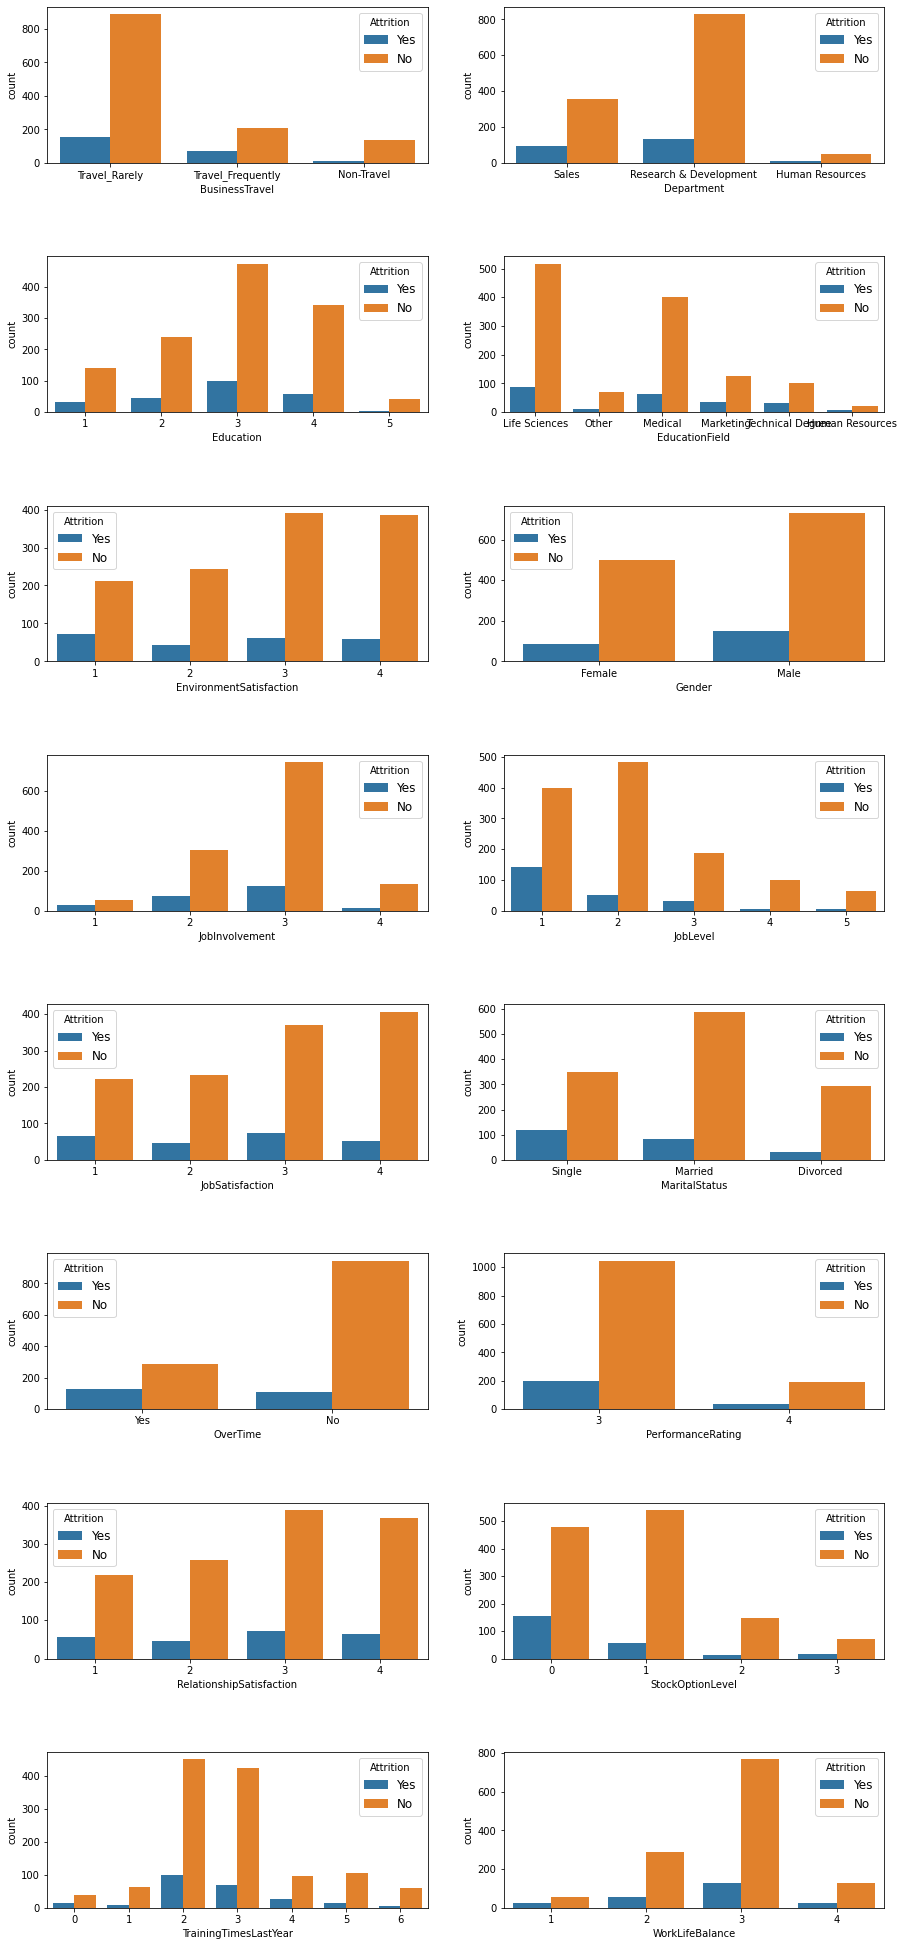

In [0]:
target_column = ["Attrition"]
singular_list = ['EmployeeCount',  'Over18',  'StandardHours']
category_cols = df.nunique()[df.nunique() <= 8].keys().tolist()
category_cols = [x for x in category_cols if x not in target_column]
category_cols = [col for col in category_cols if col not in (singular_list +['Attrition'])]
fighure, axes = plt.subplots(nrows=8, ncols=2, figsize=(15,30))
fighure.subplots_adjust(hspace=0.6, bottom=0)
for ax, catplot in zip(axes.flatten(), category_cols):
        sns.countplot(x=catplot, data=df, hue='Attrition', ax=ax, )
        ax.legend(title='Attrition', fontsize=12)

It's being understood from these plots that there are some of these features that have high chance of attrition: Features like StockOptionLevel, JobLevel, Reasearch&Development, Overall Performance, etc.

**Distribution Plot**

Now, Understanding the Maximum and minimum Age of the employees present in the dataset and visualising to understand which age-group of employees are likely to quit the company(Attrition=Yes)

Minimum age of the employees on the entire dataset is 18 , the maximum age is 60


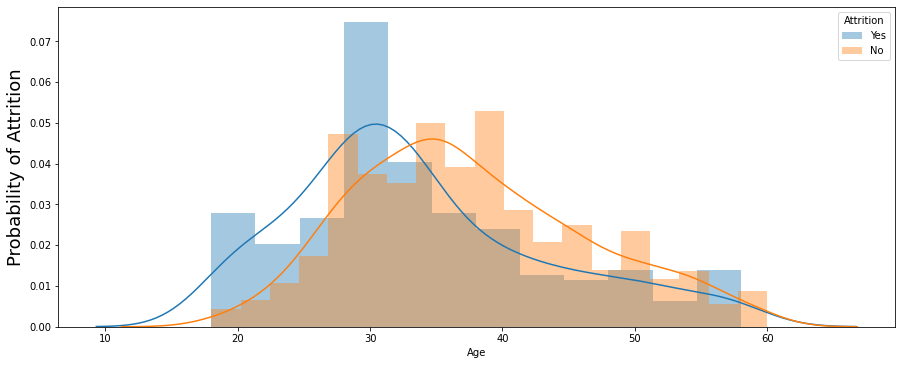

In [0]:
print(f'Minimum age of the employees on the entire dataset is {df["Age"].min()} , the maximum age is {df["Age"].max()}')
plt.figure(figsize=(15,20))
plt.subplot(3,1,1)
g = sns.distplot(df[df['Attrition'] == 'Yes']['Age'], label='Yes')
g = sns.distplot(df[df['Attrition'] == 'No']['Age'], label='No')
g.set_ylabel("Probability of Attrition", fontsize=18)
g.legend(title='Attrition')

**Violin Plot**

Also, to Understand if the Employee's age and his distance from home is affecting his Attrition; we plot the below graph.
This also helps us get the age-group that are likely to attrite.

Text(0.5, 1.0, 'Distance From Home Distribution by Attrition and Age')

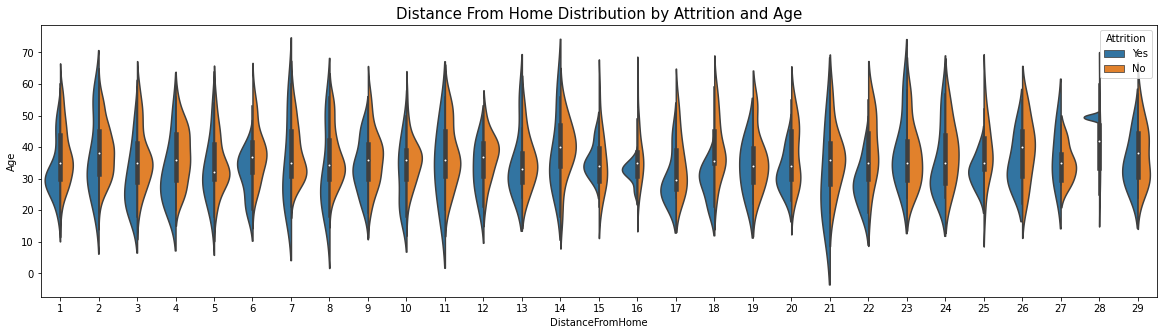

In [0]:
plt.figure(figsize=(20,5))
gx = sns.violinplot(x='DistanceFromHome', y='Age', hue='Attrition', 
                    split=True, data=df, size=3)
# gx.set_xticklabels(g1.get_xticklabels(),rotation=0)
gx.set_title("Distance From Home Distribution by Attrition and Age", fontsize=15)

We can conclude from the above plot that Employees who are younger i.e who are below the age of 30 are more likely to leave the company.

**Violin Plot**

Similarily, we tend to understand the trends between Salary Hike, Attrition by Age of the Employee.

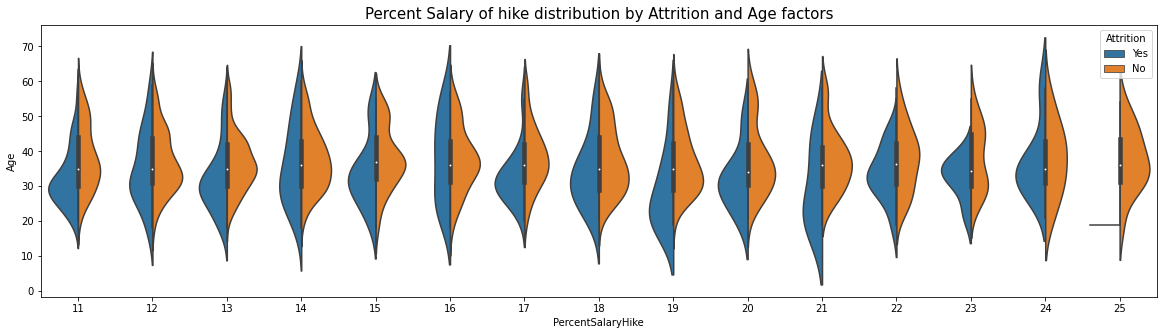

In [0]:
plt.figure(figsize=(20,5))
gy = sns.violinplot(x='PercentSalaryHike', y='Age',
                    split=True, hue='Attrition',data=df)
gy.set_xticklabels(gy.get_xticklabels(),rotation=0)
gy.set_title("Percent Salary of hike distribution by Attrition and Age factors", fontsize=15)
plt.subplots_adjust(hspace = 0.4)
plt.show()

The above violin Graph makes us understand the same trend i.e. Atrrition is more dependent on the 'Age' Factor and Employees who are around 30 years of age are more likely to leave the company.

**Swarm Plot**

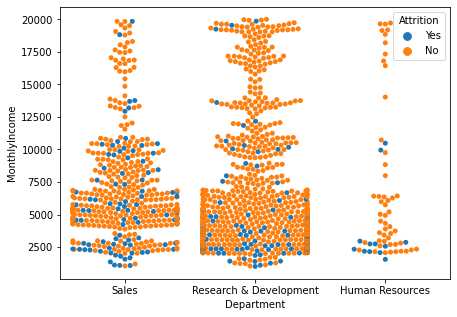

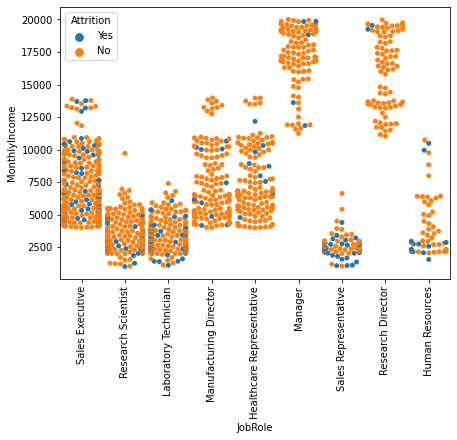

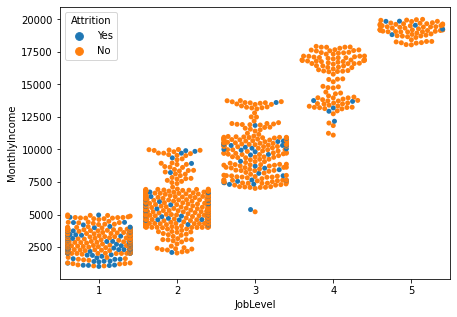

In [0]:
plt.figure(figsize=(7,5))
sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df);
plt.show()

plt.figure(figsize=(7,5))
sns.swarmplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=df);
plt.xticks( rotation=90 )
plt.show()

plt.figure(figsize=(7,5))
sns.swarmplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=df);
plt.show()

From the above swarm plot, 
*   Its clear that Employees whose Monthly Income is around 2500 are likely to quit the firm.

*   All the sales Representatives at IBM have nearly same pay scale and are paid the least


*   Employees whose Job Level is 1 are paid the least irrespective of the Department and are more likely to attrite.
*   There is more population in Research and Development Department of the Company. Sales is the second most populated.


**Box Plot**

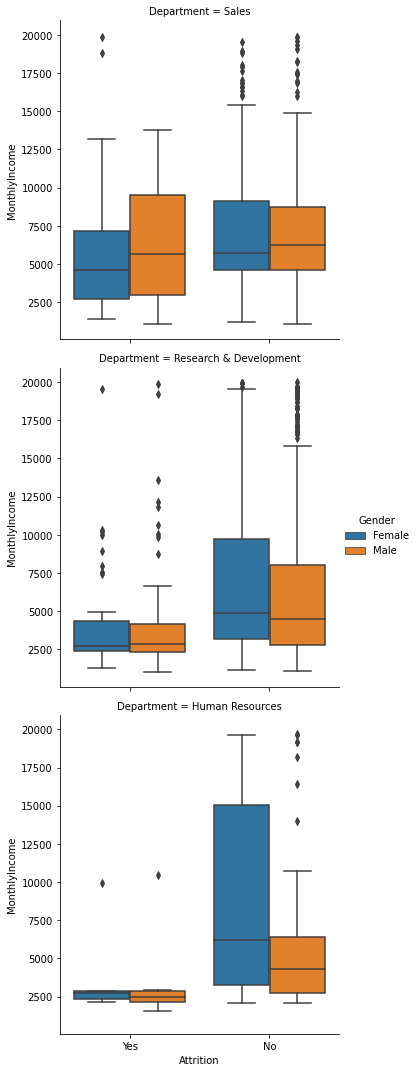

<Figure size 360x360 with 0 Axes>

In [0]:
sns.factorplot(x = 'Attrition', y ='MonthlyIncome', hue = 'Gender',col = 'Department', col_wrap=1, kind = 'box', data = df)
plt.figure(figsize=(5,5))
plt.show()

The above fighures are a representation of Factor plot; generated between a Continous Variable and Categorical variable.
The key observations from the above factor plots are:


*   More number of Females are likely to attrite; irrespective of their monthly Income.
*   The attrition number in Human Resources Department is the least for both Female and male employees compared to other Departments.


*   More number of employees ; both male and female are likely to attrite from the Sales Department.

**Histogram**

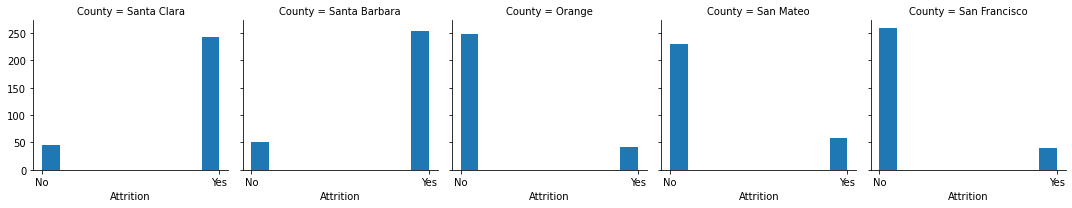

In [0]:
g = sns.FacetGrid(df,col='County')
g.map(plt.hist, 'Attrition')


From the above histogram, we can see that most of the Employee Attrition took place in Santa Clara and Santa Barbara county. San Francisco county had less Employee Attrition.

# Feature Engineering

**Load and view the data**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [0]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,avg_salary,low_salary,high_salary,Per Capita Income
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,5837.068707,3870.827891,8701.279592,3408.393878
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,2474.074722,1719.011483,3492.987578,622.926501
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2573.000000,2000.000000,3333.000000,2544.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2897.000000,2083.000000,3917.000000,2868.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,6346.000000,3750.000000,9333.000000,3556.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,6431.000000,4250.000000,10583.000000,3933.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,10883.000000,7917.000000,14250.000000,4166.000000


Employee Number is just the serial number, so we can remove it.

In [0]:
df.drop(['EmployeeNumber'], axis=1, inplace=True)

**Removing Singular value columns**

In [0]:
# Check value_counts and remove any columns with singular values
single_cols = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)
        single_cols.append(col)
# Now lets drop the columns
df.drop(single_cols, axis=1, inplace=True)

EmployeeCount
Over18
StandardHours


**Converting the Age Attribute which is continuous variable to multi-class variable**

In [0]:
for index, row in df.iterrows():
    if row['Age'] <= 30:
        df.at[index,'Age']=0
    elif 30 < row['Age'] <= 50:
        df.at[index,'Age']=1
    elif row['Age'] > 50:
        df.at[index,'Age']=2

**Converting the DistancefromHome Attribute which is continous variable into 3 buckets like
less distance = 0, medium distance = 1 and far = 2**

In [0]:
for index, row in df.iterrows():
    if row['DistanceFromHome'] <= 10:
        df.at[index,'DistanceFromHome']=0
    elif 10 < row['DistanceFromHome'] <= 20:
        df.at[index,'DistanceFromHome']=1
    elif row['DistanceFromHome'] > 20:
        df.at[index,'DistanceFromHome']=2

**Converting the PercentSalaryHike Attribute which is continuous variable to multi-class variable**

In [0]:
for index, row in df.iterrows():
    if row['PercentSalaryHike'] <= 15:
        df.at[index,'PercentSalaryHike']=0
    elif 15 < row['PercentSalaryHike'] <= 20:
        df.at[index,'PercentSalaryHike']=1
    elif row['PercentSalaryHike'] > 20:
        df.at[index,'PercentSalaryHike']=2

**Converting Object types to int using cat.codes**

In [0]:
for col in [ 'Attrition', 'BusinessTravel', 'Gender', 'JobRole', 'OverTime', 'EducationField', 'Department', 'MaritalStatus','County']:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int8   
 2   BusinessTravel            1470 non-null   int8   
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int8   
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int8   
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int8   
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   int8   
 14  JobSatis

In [0]:
mms = MinMaxScaler()
df[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'Per Capita Income']] = mms.fit_transform(df[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'Per Capita Income']])
print(df[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'Per Capita Income']])

      DailyRate  HourlyRate  MonthlyIncome  MonthlyRate  Per Capita Income
0      0.715820    0.914286       0.262454     0.698053           0.623921
1      0.126700    0.442857       0.217009     0.916001           0.623921
2      0.909807    0.885714       0.056925     0.012126           0.000000
3      0.923407    0.371429       0.100053     0.845814           0.623921
4      0.350036    0.142857       0.129489     0.583738           0.623921
...         ...         ...            ...          ...                ...
1465   0.559771    0.157143       0.082254     0.409396           0.000000
1466   0.365784    0.171429       0.472986     0.777474           0.199753
1467   0.037938    0.814286       0.270300     0.123670           0.623921
1468   0.659270    0.471429       0.230700     0.447661           0.199753
1469   0.376521    0.742857       0.178778     0.326601           0.199753

[1470 rows x 5 columns]


**Finding Latent Manifold Features**

This can be done by computing the information content for each feature. This means to pick the features with the highest entropy.

In [0]:
from collections import Counter
from scipy import stats

for col in df.columns:
    entropy = stats.entropy(df[col].values, base=2)
    print(str(col) +":" + str(entropy))

Age:10.027830699107076
Attrition:7.888743248898257
BusinessTravel:10.323627781938299
DailyRate:10.24382148252573
Department:10.3742656225842
DistanceFromHome:8.710220373254995
Education:10.423466933255554
EducationField:10.263623775405673
EnvironmentSatisfaction:10.392547303128143
Gender:9.78463484555752
HourlyRate:10.251473419910393
JobInvolvement:10.468037742828866
JobLevel:10.329816620013753
JobRole:10.23400249697295
JobSatisfaction:10.390673631528482
MaritalStatus:10.072765689057688
MonthlyIncome:10.060052510715169
MonthlyRate:10.239575521692867
NumCompaniesWorked:9.907259462073736
OverTime:8.700439718141094
PercentSalaryHike:9.022170816360855
PerformanceRating:10.512771828424214
RelationshipSatisfaction:10.394874355135771
StockOptionLevel:9.57148050150521
TotalWorkingYears:10.194366256785253
TrainingTimesLastYear:10.353619034798296
WorkLifeBalance:10.469757962112826
YearsAtCompany:10.03979996338687
YearsInCurrentRole:9.95518698762917
YearsSinceLastPromotion:9.241866119618846
Years

From the above calculation, we found out that the 

1. information content is not concentrated on a few features and it is almost evenly distributed. However, we will pick the features from which the latent variable can be derived.
2. We picked all the features related to satisfaction and JobInvolvement, PerformanceRating we are going to predict a new latent variables in the next section.


**Using manifold to predict new features**


1. We gave weights to different satisfaction related features based on practical intution to find a new features named Overall_Satisfaction and Performace_Involvement
2. 50% weight to JobSatisfaction, 30% to EnvironmentSatisfaction and 20% to RelationshipSatisfaction.
3. Performace_Involvement can be calculated by doing PerformanceRating * JobInvolvement







In [0]:
df['Overall_Satisfaction'] = (df['JobSatisfaction'] * 0.7) + (df['EnvironmentSatisfaction'] * 0.2)+ (df['RelationshipSatisfaction'] * 0.1)
df['Performance_Involvement'] = df['JobInvolvement'] * df['PerformanceRating']

In [0]:
y = df['Attrition']
X = df.drop(['Attrition'], axis=1)

#Clustering


1. KMeans
2. Gaussian Mixture Model(GMM)
3. Principal Component Analysis



**K-Means Clustering**

As we know there are only two values in the class label, lets try to see how KMeans clusters the dataset to see if there is a clear sepearation.

In [0]:
# As K has to provided in K-Means clustering, lets jsut start with K = 2  
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(X)

kmeans2.cluster_centers_

array([[8.55555556e-01, 1.61666667e+00, 4.97934065e-01, 1.35462963e+00,
        4.30555556e-01, 2.93703704e+00, 2.21759259e+00, 2.71666667e+00,
        5.81481481e-01, 5.08373016e-01, 2.73796296e+00, 2.21203704e+00,
        5.58888889e+00, 2.73055556e+00, 1.10000000e+00, 3.23995768e-01,
        4.92583149e-01, 2.69444444e+00, 2.93518519e-01, 4.99074074e-01,
        3.15185185e+00, 2.72037037e+00, 7.83333333e-01, 1.18101852e+01,
        2.76944444e+00, 2.77870370e+00, 7.31944444e+00, 4.39907407e+00,
        2.27685185e+00, 4.26666667e+00, 6.93806019e+03, 4.52650000e+03,
        1.04997731e+04, 1.99907407e+00, 5.33226584e-01, 2.72675926e+00,
        8.61666667e+00],
       [7.76923077e-01, 1.58205128e+00, 5.11078685e-01, 1.00000000e+00,
        4.69230769e-01, 2.84615385e+00, 2.33076923e+00, 2.73589744e+00,
        6.51282051e-01, 5.24798535e-01, 2.70769231e+00, 1.65384615e+00,
        1.32820513e+00, 2.72307692e+00, 1.08974359e+00, 1.93244083e-01,
        4.85215717e-01, 2.68974359e+00,

**Using Elbow Method to find the number of clusters**

As there is no clear seperation from above, lets try to use elbow method to find optimal number of cluster and run the model again.

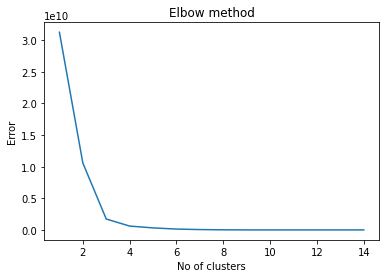

0    1233
1     237
Name: Attrition, dtype: int64

In [0]:
# Lets try to find the elbow of SSE scores and choose the optimal value for K
error =[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    error.append(kmeans.inertia_)
    
plt.plot(range(1, 15), error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
y.value_counts()

**Trying to use 3 clusters as shown in the above graph**

In [0]:
# From the elbow curve, choosing K=3 provides the best clustering results
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(X)
df['cluster'] = y_kmeans3
df['cluster_distance'] = pd.DataFrame(kmeans3.transform(X)).min(axis=1)

collections.Counter(y_kmeans3)

Counter({0: 855, 1: 390, 2: 225})

In [0]:
# Now lets calculate the percentage of credit_score_classification_of_that_person for each cluster.
def attrition_percentage(x):
    print("Cluster {}".format(x['cluster'].iloc[0]))
    value_counts = x['Attrition'].value_counts()
    print (value_counts)
    attr_per = 100 * (value_counts[1]/float(value_counts[0] + value_counts[1]))
    print("Attrition percentage {}".format(attr_per))
    
df.groupby(by=['cluster']).apply(attrition_percentage)

Cluster 0
0    701
1    154
Name: Attrition, dtype: int64
Attrition percentage 18.01169590643275
Cluster 1
0    319
1     71
Name: Attrition, dtype: int64
Attrition percentage 18.205128205128204
Cluster 2
0    213
1     12
Name: Attrition, dtype: int64
Attrition percentage 5.333333333333334


""


As we can see above, there is no clear seperation even with 4 clusters

**Checking if there are any outliers in the data using KMeans**

In [0]:
# Now lets detect outliers from cluster distance for each record that we stored above
# Considering outliers as the ones for which distance from its centroid exceed 2  * Mean 
outlier_indices=[]
def is_outlier(x):
    mean = x['cluster_distance'].mean()
    outliers = []
    for index, row in x.iterrows():
        if row['cluster_distance'] > 2 * mean:
            outliers.append(True)
            outlier_indices.append(index)
        else:
            outliers.append(False)
    df_outliers = pd.DataFrame(outliers)
    print("Cluster {}".format(x['cluster'].iloc[0]))
    print (df_outliers[0].value_counts())

print('shape before removing outliers')
print(df.shape)
df.groupby(by=['cluster']).apply(is_outlier)
df.drop(index=outlier_indices, inplace=True)
print('shape after removing outliers')
print(df.shape)


shape before removing outliers
(1470, 40)
Cluster 0
False    720
True     135
Name: 0, dtype: int64
Cluster 1
False    390
Name: 0, dtype: int64
Cluster 2
False    225
Name: 0, dtype: int64
shape after removing outliers
(1335, 40)


**Gaussian Mixture Model** 

Performing the same clustering anaysis using GMM with 3 clusters

In [0]:
gmm = GaussianMixture(n_components=3, covariance_type = 'full', random_state=0)
y_gmm = gmm.fit_predict(X)
df['cluster'] = pd.Series(y_gmm)
probs = pd.DataFrame(gmm.predict_proba(X))

collections.Counter(y_gmm)

Counter({0: 390, 1: 855, 2: 225})

In [0]:
# Now lets calculate the percentage of credit_score_classification_of_that_person for each cluster.
def attrition_percentage(x):
    print("Cluster {}".format(x['cluster'].iloc[0]))
    value_counts = x['Attrition'].value_counts()
    print (value_counts)
    attr_per = 100 * (value_counts[1]/float(value_counts[0] + value_counts[1]))
    print("Attrition percentage {}".format(attr_per))
    
df.groupby(by=['cluster']).apply(attrition_percentage)

Cluster 0
0    319
1     71
Name: Attrition, dtype: int64
Attrition percentage 18.205128205128204
Cluster 1
0    611
1    109
Name: Attrition, dtype: int64
Attrition percentage 15.138888888888888
Cluster 2
0    213
1     12
Name: Attrition, dtype: int64
Attrition percentage 5.333333333333334


""


Same as KMeans clustering, we can see above that there is no clear seperation even with GMM

**Principal Component Analysis (PCA)**

Lets perform PCA and see if there are any principal components with high variance ratio. If so, we can reduce the number of dimensions in the dataset.

In [0]:
# Lets plot the data on 2 dimensional plane to see if our model predicts good going forward.

# Otherwise it takes lot of time.
# PCA Dimensionality reduction
pca = PCA(n_components=2, random_state=100)
pca_components = pca.fit_transform(X.values)

print(pca.explained_variance_ratio_)
# So, we can see that the principal component covers the highest variance ratio. So we can consider
# reducing the dimensions if training takes much time. We will revisit this later

[0.97226547 0.02730874]


# Model Training

**Oversampling the Attrition segment of data**

As our data is heavily skewed towards No attrition data, we have done oversampling using SMOTE.

In [0]:
df_attrition = df[df['Attrition'] == 1]
df_no_attrition = df[df['Attrition'] == 0]

In [0]:
# ====================  Random Over sampling technique ====================

print('Random over sampling')
df_fraud_over_sampled = df_attrition.sample(len(df_no_attrition), replace=True)

df_random_over_sampled = pd.concat([df_no_attrition, df_fraud_over_sampled])
print(df_random_over_sampled['Attrition'].value_counts())


# # ====================  Over sampling using SMOTE algorithm ====================
# print('Random over sampling using SMOTE')
# y = df['Attrition']
# X = df.drop(['Attrition'], axis=1)
# smote = SMOTE(sampling_strategy='minority')
# X_smote, y_smote = smote.fit_resample(X, y)
# df_X_smote = pd.DataFrame(X_smote, columns=X.columns)
# df_y_smote = pd.DataFrame(y_smote, columns=['Attrition'])

# df_smote = pd.concat([df_X_smote, df_y_smote], axis=1)
# print(df_smote['Attrition'].value_counts())
# del df_X_smote, df_y_smote

# y = df_smote['Attrition']
# X = df_smote.drop(['Attrition'], axis=1)

# X.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)


df = df_random_over_sampled

Random over sampling
1    1143
0    1143
Name: Attrition, dtype: int64


In [0]:
df.info()
print(df.shape)
# X.drop(['cluster','cluster_distance'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 1 to 801
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2286 non-null   int64  
 1   Attrition                 2286 non-null   int8   
 2   BusinessTravel            2286 non-null   int8   
 3   DailyRate                 2286 non-null   float64
 4   Department                2286 non-null   int8   
 5   DistanceFromHome          2286 non-null   int64  
 6   Education                 2286 non-null   int64  
 7   EducationField            2286 non-null   int8   
 8   EnvironmentSatisfaction   2286 non-null   int64  
 9   Gender                    2286 non-null   int8   
 10  HourlyRate                2286 non-null   float64
 11  JobInvolvement            2286 non-null   int64  
 12  JobLevel                  2286 non-null   int64  
 13  JobRole                   2286 non-null   int8   
 14  JobSatisf

In [0]:
y = df['Attrition']
X = df.drop(['Attrition'], axis=1)

In [0]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

In [0]:
classifiers = {
    "LogisticRegression": (LogisticRegression()),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

def run_all_models(folds=5):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        if classifier_name != 'Support Vector Classifier':
            y_final_pred_prob = model.predict_proba(X_test)
            plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
            plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)



In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

============================= LogisticRegression =============================
Mean cross validation score: 0.6701313759409042
Mean precision score: 0.6518686791295062
Mean Recall score: 0.6957725334774515
Mean ROC-AUC score: 0.6624452050681559
Mean F1 score: 0.6724932399409196
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6877729257641921
confusion matrix for the real test set:
 [[150  79]
 [ 64 165]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68       229
           1       0.68      0.72      0.70       229

    accuracy                           0.69       458
   macro avg       0.69      0.69      0.69       458
weighted avg       0.69      0.69      0.69       458



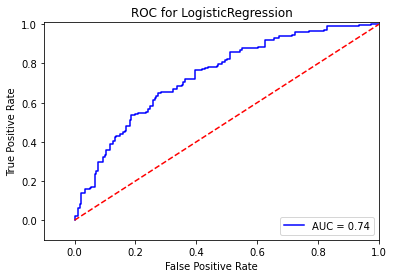

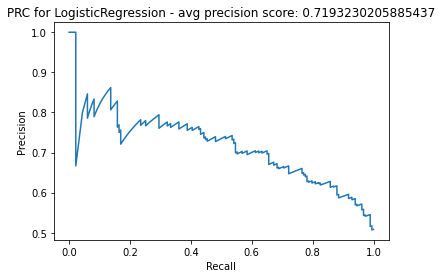

============================= KNearest =============================
Mean cross validation score: 0.7456229837767077
Mean precision score: 0.7329517412783101
Mean Recall score: 0.8850717588422506
Mean ROC-AUC score: 0.7811535459076444
Mean F1 score: 0.8014993410030341
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.7467248908296943
confusion matrix for the real test set:
 [[147  82]
 [ 34 195]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.81      0.64      0.72       229
           1       0.70      0.85      0.77       229

    accuracy                           0.75       458
   macro avg       0.76      0.75      0.74       458
weighted avg       0.76      0.75      0.74       458



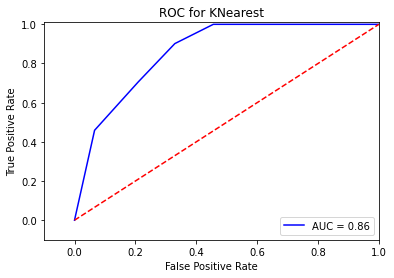

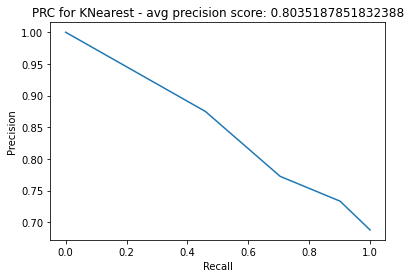

============================= Support Vector Classifier =============================
Mean cross validation score: 0.5601739211744355
Mean precision score: 0.5344385267621792
Mean Recall score: 0.9321203386777158
Mean ROC-AUC score: 0.560157329009788
Mean F1 score: 0.6793214051444586
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5698689956331878
confusion matrix for the real test set:
 [[ 41 188]
 [  9 220]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.82      0.18      0.29       229
           1       0.54      0.96      0.69       229

    accuracy                           0.57       458
   macro avg       0.68      0.57      0.49       458
weighted avg       0.68      0.57      0.49       458

============================= DecisionTreeClassifier =============================
Mean cross validation score: 0.8900397400532986
Mean precision score: 0.8518650632079368
Mean R

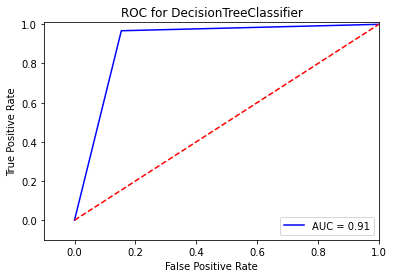

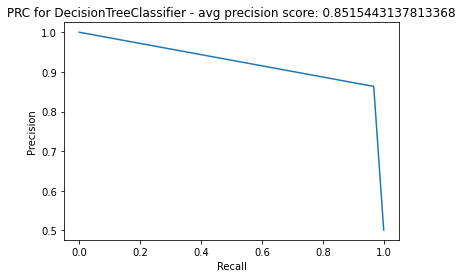

============================= Naive Bayes =============================
Mean cross validation score: 0.6911903314787976
Mean precision score: 0.6606379036603689
Mean Recall score: 0.7723473248063413
Mean ROC-AUC score: 0.6881432774875398
Mean F1 score: 0.711887064604858
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.7052401746724891
confusion matrix for the real test set:
 [[133  96]
 [ 39 190]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.77      0.58      0.66       229
           1       0.66      0.83      0.74       229

    accuracy                           0.71       458
   macro avg       0.72      0.71      0.70       458
weighted avg       0.72      0.71      0.70       458



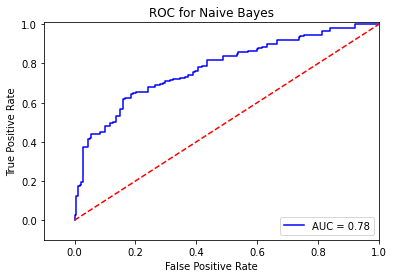

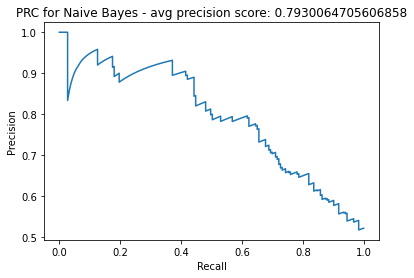

============================= Random forests =============================
Mean cross validation score: 0.958005516854458
Mean precision score: 0.9567663997012111
Mean Recall score: 0.9879781420765028
Mean ROC-AUC score: 0.9715606797574011
Mean F1 score: 0.9720322388782423
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.9672489082969432
confusion matrix for the real test set:
 [[220   9]
 [  6 223]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       229
           1       0.96      0.97      0.97       229

    accuracy                           0.97       458
   macro avg       0.97      0.97      0.97       458
weighted avg       0.97      0.97      0.97       458



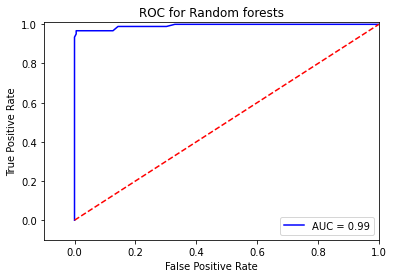

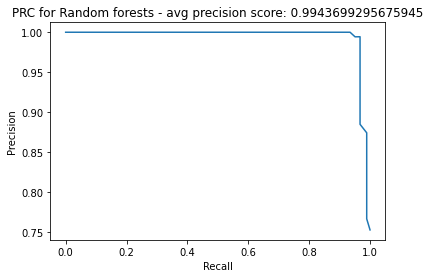

============================= XGBoost Classifier =============================
Mean cross validation score: 0.887019963532657
Mean precision score: 0.8719443215545993
Mean Recall score: 0.9223082928000961
Mean ROC-AUC score: 0.8933255269320842
Mean F1 score: 0.8962687726849576
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.888646288209607
confusion matrix for the real test set:
 [[202  27]
 [ 24 205]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       229
           1       0.88      0.90      0.89       229

    accuracy                           0.89       458
   macro avg       0.89      0.89      0.89       458
weighted avg       0.89      0.89      0.89       458



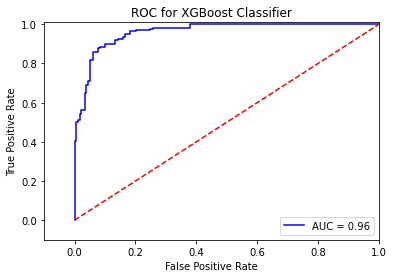

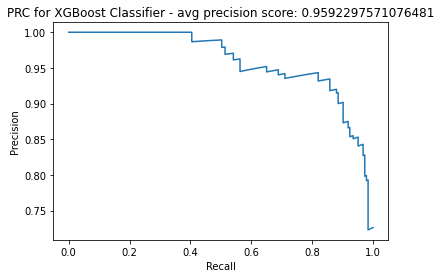

============================= GradientBoostingClassifier =============================
Mean cross validation score: 0.9016461732666324
Mean precision score: 0.8760558061067766
Mean Recall score: 0.9343481654957065
Mean ROC-AUC score: 0.9009878100042034
Mean F1 score: 0.9041047258000221
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.9061135371179039
confusion matrix for the real test set:
 [[202  27]
 [ 16 213]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       229
           1       0.89      0.93      0.91       229

    accuracy                           0.91       458
   macro avg       0.91      0.91      0.91       458
weighted avg       0.91      0.91      0.91       458



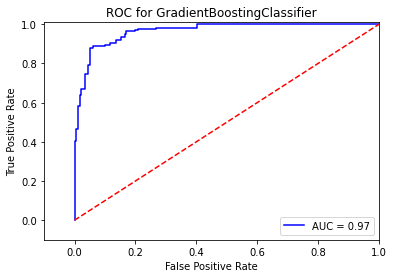

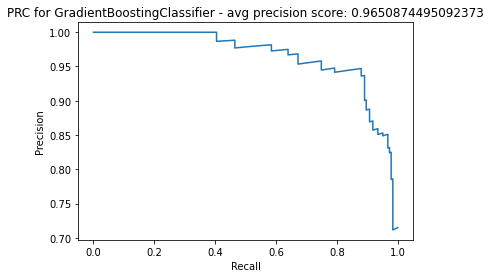

============================= MLP Classifier =============================
Mean cross validation score: 0.5282673336761887
Mean precision score: 0.3478088905576123
Mean Recall score: 0.4567825617005945
Mean ROC-AUC score: 0.5349486578994775
Mean F1 score: 0.36478519695997597
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5
confusion matrix for the real test set:
 [[229   0]
 [229   0]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       229
           1       0.00      0.00      0.00       229

    accuracy                           0.50       458
   macro avg       0.25      0.50      0.33       458
weighted avg       0.25      0.50      0.33       458



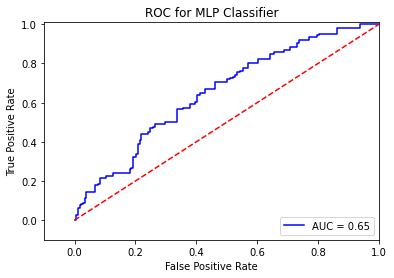

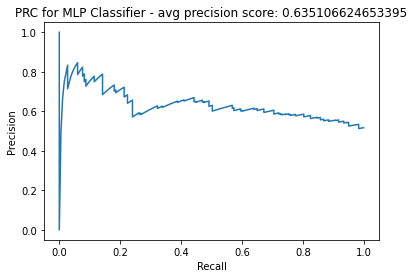

In [0]:
run_all_models()

**Linear Regression**

In [0]:
regressor = LinearRegression()
regressor.fit(X_final_train, y_final_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

0.06921785441294398
[ 2.79870050e-03  1.24812319e-02 -7.81547124e-02  7.34922945e-02
  6.80244075e-02 -1.02747363e-02  2.44567664e-02 -6.52428105e-02
  7.61591814e-02 -2.85785378e-02 -8.55905247e-02  2.45428955e-03
  2.90087740e-02 -2.41340734e-02  1.35606094e-01  3.41619814e-01
  3.62126682e-02  2.42527670e-02  2.81754701e-01 -8.66100980e-03
 -2.97200144e-02 -5.16090563e-02 -5.43580336e-03 -1.18143122e-02
 -3.09802736e-02 -2.75126682e-02  1.39869608e-02 -1.68295132e-02
  2.55511601e-02 -1.82472758e-02  1.31626776e-03 -8.01974517e-04
 -2.92764089e-04 -2.74570538e-03 -4.63956601e-02 -3.51033191e-02
  3.96779532e-03 -1.55072218e+00 -7.65528236e-05]


We cannot apply Linear Regression as this is a classification problem.

In [0]:
y_pred = regressor.predict(X_final_test)

In [0]:
df = pd.DataFrame({'Actual': y_final_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1,0.967330
1,0,0.674004
2,0,0.918522
3,0,-0.019254
4,0,-0.044572
...,...,...
453,1,1.212578
454,0,0.230383
455,0,0.325326
456,0,0.750669


# Conclusion

*  As it is observed, all the Data preparation including Data enrichment, Data cleaning and Preprocessing has helped in boosting the performance of our classifying models.
*  After running multiple classification Algorithms; it is understood that Decision Trees, Random Forest,  XGBoost and Gradient Boost classifiers performed better.
*  We were able to achieve an accuracy of 97% with the Random Forest classifier. 
*  The Cross validation score is 95% which means the model was less biased and more generalised on predicting the unseen data.
*  The Type I and Type II errors from the confusion matrix have also been the least which means the model could correctly classify most of the True Positives and True Negatives appropriately.
*  Finally,looking at the AUC-ROC curve; the area under the curve has been the maximum for Random Forest which clearly throws light on the model’s capability of distinguishing the classes correctly.






 




